In [1]:
# 导入相应的包
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# K-means中K值
k = 3

# 随机初始化K个中心点，把结果存储在C
X = np.random.random((200, 2))*10
C_x = np.random.randint(0, np.max(X), size=k)
C_y = np.random.randint(0, np.max(X), size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)

print("初始化之后的中心点：", C)

初始化之后的中心点： [[1. 0.]
 [5. 5.]
 [8. 1.]]


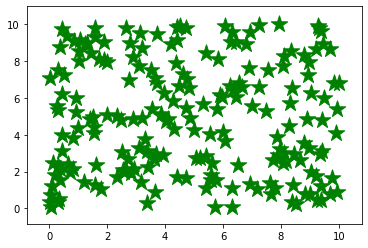

In [3]:
# 展示中心点
plt.scatter(X[:,0], X[:,1], c='#050505', s=7)
plt.scatter(X[:,0], X[:,1], marker='*', s=300, c='g')

In [4]:
# 存储之前的中心点
C_old = np.zeros(C.shape)
clusters = np.zeros(len(X))

def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

error = dist(C, C_old, None)

In [5]:
# 循环算法，直到收敛。收敛的条件就是，判断当前的中心点与之前的中心点之间的有没有变化，
# 没有变化距离就变成0，然后抛出异常
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # 在计算新的中心点之前，先把旧的中心点存下来，以便计算距离
    C_old = deepcopy(C)
    # 计算新的中心点
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

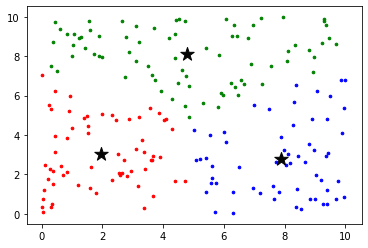

In [6]:
colors = ['r','g','b','y','c','m']

fig, ax = plt.subplots()
for i in range(k):
    points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
    ax.scatter(points[:,0], points[:,1], s=7, c=colors[i])
    
ax.scatter(C[:,0], C[:,1], marker='*', s=200, c='#050505')

---

### Vector Quantization Demo

In [7]:
# 导入相应的库
from pylab import imread,imshow,figure,show,subplot
from numpy import reshape,uint8,flipud
from sklearn.cluster import KMeans
from copy import deepcopy

In [8]:
# 读入图片数据
img = imread('/Users/shy/Pictures/1.jpg')

In [9]:
# 将三维矩阵转换成二维的矩阵
pixel = reshape(img, (img.shape[0]*img.shape[1],3))
pixel_new = deepcopy(pixel)

print(img.shape)

(1440, 2560, 3)


In [10]:
# 创建K-means模型，可以尝试修改 n_clusters参数试试
model = KMeans(n_clusters=3)
labels = model.fit_predict(pixel)
palette = model.cluster_centers_

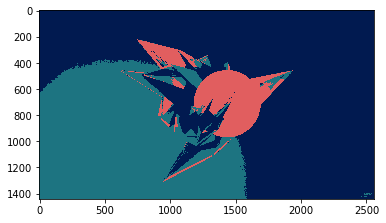

In [11]:
for i in range(len(pixel)):
    pixel_new[i,:] = palette[labels[i]]
    
# 展示重新构造的图片（压缩后的图片）
imshow(reshape(pixel_new, (img.shape[0], img.shape[1], 3)))

很简单吧？ 这就是最经典的图片压缩！！！